In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="css/custom.css">

In [2]:
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'figure.figsize': (12, 5)})

<img alt="" src="img/odsc.png"/>

<h1 class="title">Bayesian A/B testing</h1>

<div class="title-footnote">
    <p><b>Marc Garcia, Senior Data Scientist at Badoo</b><br/>@datapythonista</b></p>
    <p>ODSC London 2017, #ODSC</p>
</div>

## What is an A/B test?

<img alt="" src="img/meetup_ab_test_a.png"/>

## What is an A/B test?

<img alt="" src="img/meetup_ab_test_b.png"/>

## What is an A/B test?

<table>
    <tr>
        <td>
            <h4>Version A: Current version</h4>
            <img style="width: 640px" alt="" src="img/meetup_ab_test_a.png"/>
        </td>
        <td>
            <h4>Version B: New, hopefully better, alternative</h4>
            <img style="width: 640px" alt="" src="img/meetup_ab_test_b.png"/>
        </td>
    </tr>
</table>    

## Some definitions

**What does "better" mean?**

* Better in terms of conversion
    * A **conversion** is our goal: clicking the **Join us!** button

* The best version will be the one with a higher conversion rate

$$ conversion\_rate = \frac{number\_of\_clicks}{number\_of\_visits}$$

## Some definitions

**Two conversion rates**

* **Empirical** conversion rate: the one we observed

* **Real** conversion rate: the unknown one that will happen after a very large number of observations

## Is it the best version the one with higher empirical conversion rate?

Are all these *empirical* conversion rates the same?

$$\frac{1}{2} =? \frac{10}{20} =? \frac{100}{200} =? \frac{1000}{2000}$$

## Example

* **Real** conversion rate: 50%
* What will be the **empirical** conversion rate, for different **sample sizes**?

In [3]:
import numpy

REAL_CONVERSION_RATE = .5
MAX_NUM_SAMPLES = 10_000

sample_sizes = list(range(1, MAX_NUM_SAMPLES))

conversion_rates_50 = []

for sample_size in sample_sizes:

    conversions = numpy.random.choice([0, 1],
                                      size=sample_size,
                                      p=[1. - REAL_CONVERSION_RATE, REAL_CONVERSION_RATE])

    conversion_rates_50.append(conversions.sum() / sample_size)

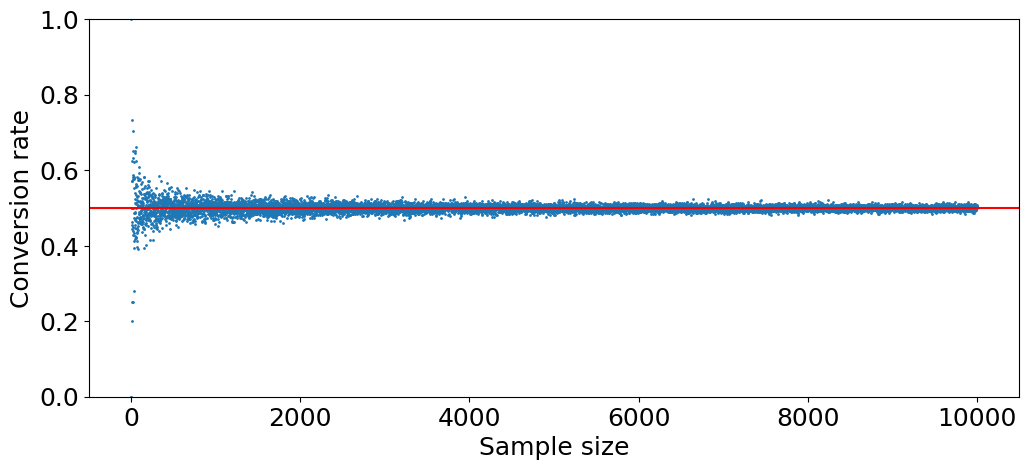

In [4]:
from matplotlib import pyplot

pyplot.scatter(sample_sizes, conversion_rates_50, s=1)
pyplot.xlabel('Sample size')
pyplot.ylabel('Conversion rate')
pyplot.axhline(.5, color='r')
pyplot.ylim(0., 1.);

In [5]:
import numpy

REAL_CONVERSION_RATE = .4
MAX_NUM_SAMPLES = 10_000

sample_sizes = list(range(1, MAX_NUM_SAMPLES))

conversion_rates_40 = []

for sample_size in sample_sizes:

    conversions = numpy.random.choice([0, 1],
                                      size=sample_size,
                                      p=[1. - REAL_CONVERSION_RATE, REAL_CONVERSION_RATE])

    conversion_rates_40.append(conversions.sum() / sample_size)

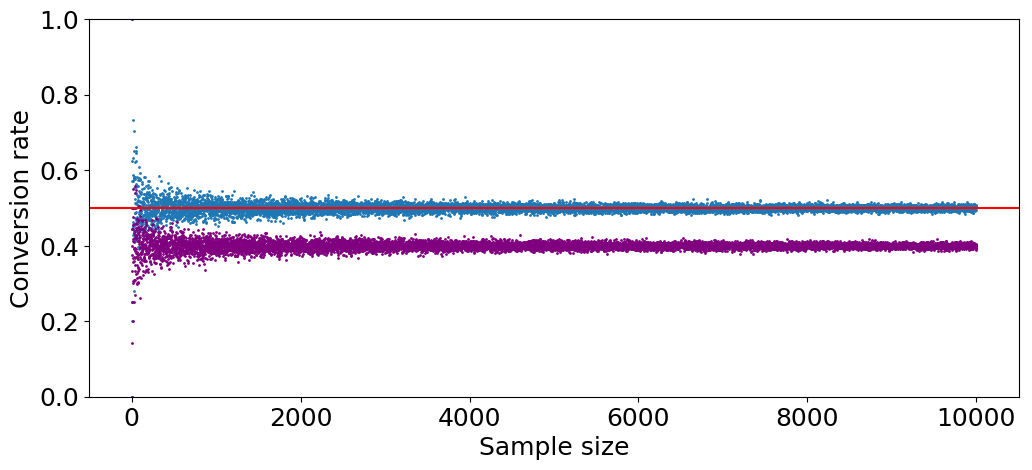

In [6]:
from matplotlib import pyplot

pyplot.scatter(sample_sizes, conversion_rates_50, s=1)
pyplot.scatter(sample_sizes, conversion_rates_40, s=1, color='purple')
pyplot.xlabel('Sample size')
pyplot.ylabel('Conversion rate')
pyplot.axhline(.5, color='r')
pyplot.ylim(0., 1.);

## Is it the best version the one with higher empirical conversion rate?

Are all these *empirical* conversion rates the same?

$$\frac{1}{2} =? \frac{10}{20} =? \frac{100}{200} =? \frac{1000}{2000}$$

## Why are they not the same?

* They are the same <i>empirical</i> conversion rate

* But our knowledge about the <i>real</i> conversion rate is not the same

* We need to consider <b>uncertainty</b>

## How can we deal with it?

* <b>3 schools of Statistics</b>

* Classic school

* Frequentist school

* Bayesian school

# Schools of statistics

## Classic school

We **avoid** uncertainty by analyzing the physical nature of the experiment

* If we study a **coin**, and we see it's symmetric and fair, we know the probability of heads is 50%

* Works great with **coins** and **dices**, but it's unfeasible to study the nature of **how human beings click buttons**

## Frequentist school

We find the **threshold** where uncertainty is not significant

* When we reach the threshold, we consider the results **statically significant**

* This is the most common approach to statistics
    * Taught at universities
    * Standard for academics
    * Also quite standard for A/B test

* But in my opinion, we can do better

## Bayesian school

We **deal** with uncertainty

* Our goal is not to find the *right* answer

* Our approach is to **reason** and **make decisions** using the uncertainty

## Example outcome

**Frequentist**

Option B is better than A with p-value 0.031
* It's statistically significant
* So we can believe it, we don't have uncertainty

**Bayesian**

Option B has 97% probability of being better than A
* We don't know for sure if it is
* But we know how certain we are
* And how much we will fail

# Frequentist A/B testing

## Example

<table>
    <tr>
        <td>
            <h4>Version A: Current version</h4>
            <img style="width: 640px" alt="" src="img/meetup_ab_test_a.png"/>
            <h4>Visits: 500, Clicks: 23</h4>
        </td>
        <td>
            <h4>Version B: New, hopefully better, alternative</h4>
            <img style="width: 640px" alt="" src="img/meetup_ab_test_b.png"/>
            <h4>Visits: 500, Clicks: 27</h4>
        </td>
    </tr>
</table>    

## Significance of a conversion rate

Is $\frac{27}{500}$ better than $\frac{23}{500}$?

Of course 5.4% > 4.6%

But this can be caused by:
* Version B being better
* Randomness / noise

## Significance of a conversion rate

Is $\frac{27}{500}$ better than $\frac{23}{500}$?

**Possible answers:**

* Better performance of B **is** statistically significant.
    * We assume B is better.

* Better performance of B **is not** statistically significant.
    * We need more data.

## How do we know if a difference in conversion rate is statistically significant?

<table>
    <tr>
        <td>
            <img alt="" src="img/egon_pearson.jpeg"/>
            <h4>Egon Pearson</h4>
        </td>
        <td>
            <img alt="" src="img/ronald_fisher.jpeg"/>
            <h4>Ronald Fisher</h4>
        </td>
    </tr>
</table>  

## Some assumptions

* There is a *true* conversation rate, that we would observe after obtaining infinite samples

* Data is independent and identically distributed (i.i.d.)

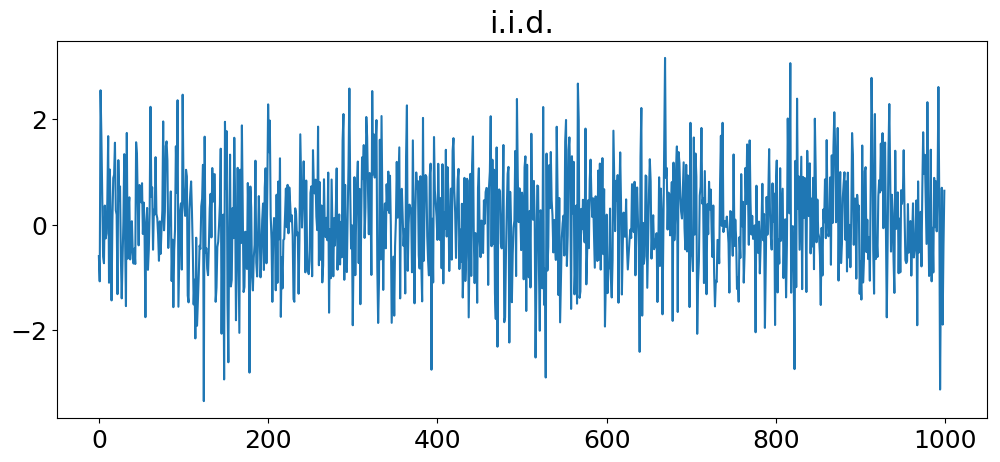

In [7]:
import numpy
from matplotlib import pyplot

pyplot.plot(numpy.random.randn(1000))
pyplot.title('i.i.d.');

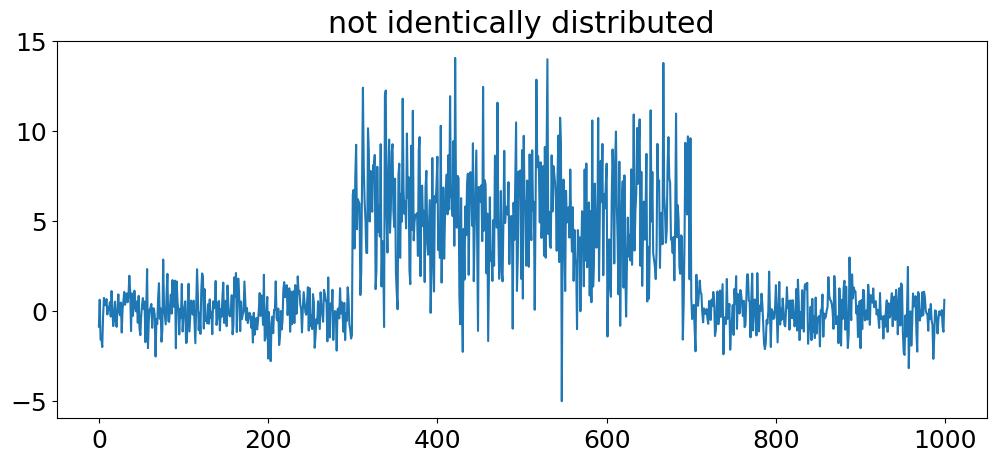

In [8]:
import numpy
from matplotlib import pyplot

pyplot.plot(numpy.concatenate([numpy.random.randn(300),
                               numpy.random.randn(400) * 3 + 5,
                               numpy.random.randn(300)]))
pyplot.title('not identically distributed');

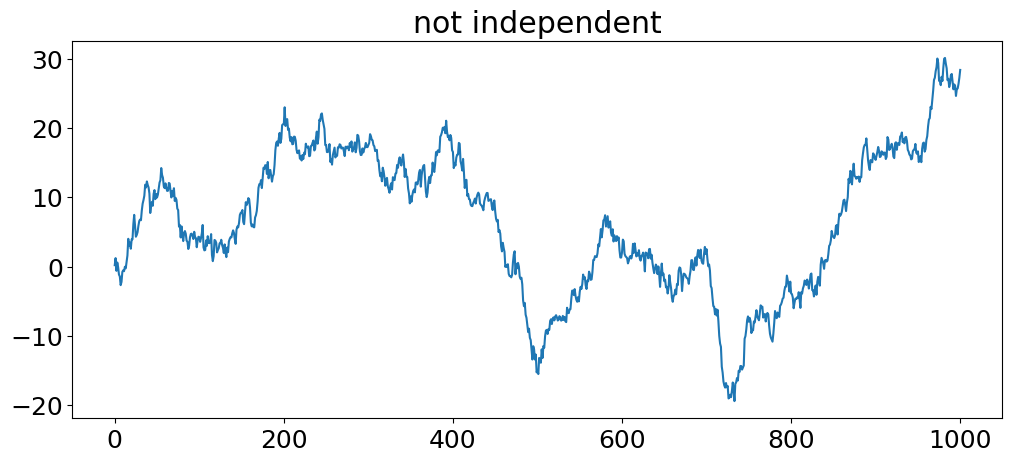

In [9]:
import random
from matplotlib import pyplot

conversions = [random.normalvariate(0., 1.)]
for i in range(1000):
    conversions.append(conversions[-1] + random.normalvariate(0., 1.))
pyplot.plot(conversions)
pyplot.title('not independent');

## Back to the example

Is $\frac{27}{500}$ better than $\frac{23}{500}$?

## How we know if a difference in conversion rate is statistically significant?

We define a **null hypothesis**

* Both *real* conversion rates are the same

* The difference between *empirical* conversion rates is due to **randomness**

* Conversions of both versions come from the **same distribution** (same parameters)

* The difference is **NOT statistically significant**

## We transform the problem

Is B better than A? $\Longrightarrow$ Is the null hypothesis false?

* If we can reject the null hypothesis, we can consider that B is better than A

## Why do we transform the problem?

* In the early 90's, tests were developed to evaluate if two samples came from the **same** distribution
    * Student's t-test, Pearson's chi square($\chi^2$)...

* Computations were computed manually with tables, and models were limited

<img alt="" src="img/statistical_table.jpg"/>

In [10]:
import numpy
import scipy.stats

A_CONVERSIONS = 23
A_NO_CONVERSIONS= 500 - A_CONVERSIONS

B_CONVERSIONS = 27
B_NO_CONVERSIONS = 500 - B_CONVERSIONS

data = numpy.array([[A_NO_CONVERSIONS, A_CONVERSIONS],
                    [B_NO_CONVERSIONS, B_CONVERSIONS]])

chi_square, p_value = scipy.stats.chi2_contingency(data)[:2]

print('χ²: %.4f' % chi_square)
print('p-value: %.4f' % p_value)

χ²: 0.1895
p-value: 0.6634


## What is the veredict?

p-value $0.6634 > 0.05$

At 95% confidence, the difference between $\frac{27}{500}$ and $\frac{23}{500}$ is **not statistically significant**

* We can't reject the null hypothesis, so it remains true / unknown

## What is wrong with this approach?

For most people is at least **good enough**, as it's still the standard

But some of us don't like it, for different reasons:

* It is complex and far from intuitive

* It depends on arbitrary parameters (95% confidence / 0.05 p-value)

* Results are not necessarily good

In [11]:
import scipy.stats

REAL_CONVERSION_RATE_A = .15
REAL_CONVERSION_RATE_B = .15

p_values = []
*samples, = range(5, 1000, 10)

for num_samples in samples:

    a_conversions = scipy.stats.binom.rvs(num_samples, REAL_CONVERSION_RATE_A)
    b_conversions = scipy.stats.binom.rvs(num_samples, REAL_CONVERSION_RATE_B)


    data = numpy.array([[num_samples - a_conversions, a_conversions],
                        [num_samples - b_conversions, b_conversions]])

    chi_square, p_value = scipy.stats.chi2_contingency(data)[:2]

    p_values.append(p_value)

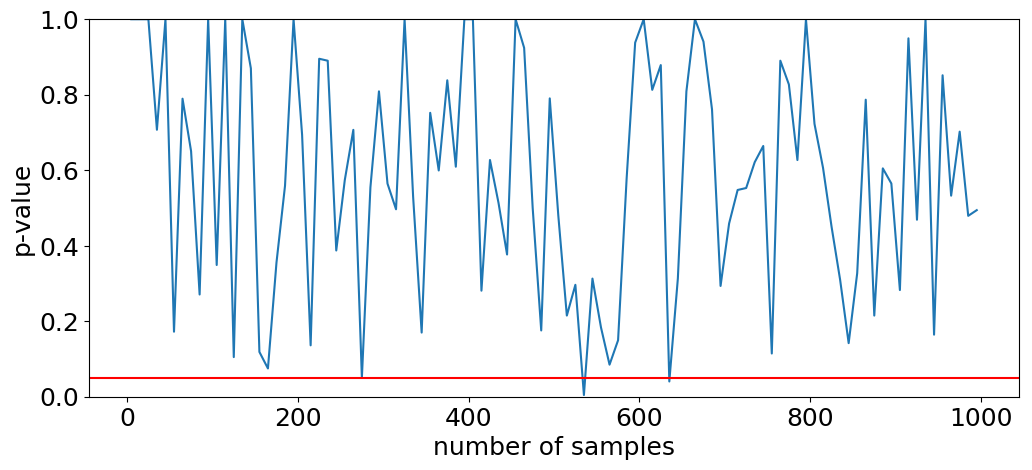

In [12]:
from matplotlib import pyplot

pyplot.plot(samples, p_values)
pyplot.ylabel('p-value')
pyplot.xlabel('number of samples')
pyplot.axhline(.05, color='r')
pyplot.ylim(0., 1.);

# Bayesian A/B testing

## Thomas Bayes

<table>
    <tr>
        <td>
            <img alt="" src="img/thomas_bayes.gif"/>
        </td>
        <td>
            <img alt="" src="img/thomas_bayes_grave.jpg"/>
        </td>
    </tr>
</table>  

## What is the Bayesian method

It is usually described as the update of prior beliefs with new beliefs.

* It's extremly interesting to know how it works
    * But I will focus on the practise for A/B testing

## What do we use to model uncertainty about the height of a population?

A **normal** distribution

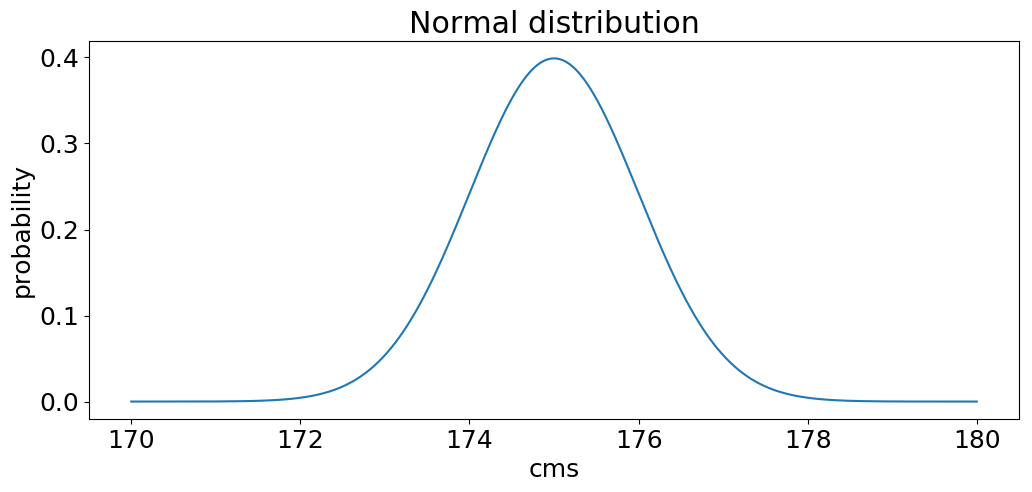

In [13]:
import numpy
import scipy.stats
from matplotlib import pyplot

x = numpy.linspace(-5., 5., 1000)
y = scipy.stats.norm.pdf(x)
pyplot.title('Normal distribution')
pyplot.xlabel('cms')
pyplot.ylabel('probability')
pyplot.plot(x + 175, y);

## What do we use to model the uncertainty of a probability?

A **beta** distribution

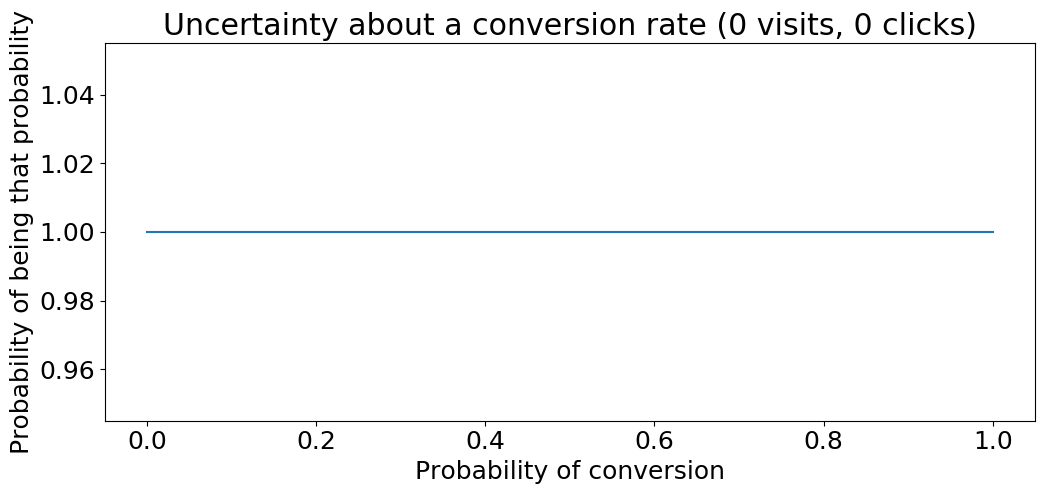

In [14]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt

x = numpy.linspace(0., 1., 1001)
y = scipy.stats.beta.pdf(x, 1, 1)
plt.title('Uncertainty about a conversion rate (0 visits, 0 clicks)')
plt.xlabel('Probability of conversion'); plt.ylabel('Probability of being that probability')
plt.plot(x, y);

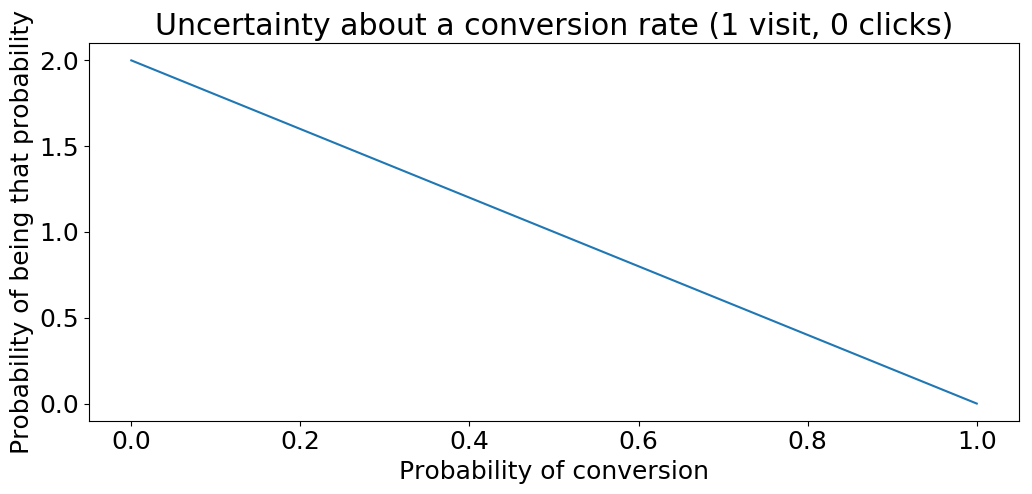

In [15]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt

x = numpy.linspace(0., 1., 1001)
y = scipy.stats.beta.pdf(x, 1, 2)
plt.title('Uncertainty about a conversion rate (1 visit, 0 clicks)')
plt.xlabel('Probability of conversion'); plt.ylabel('Probability of being that probability')
plt.plot(x, y);

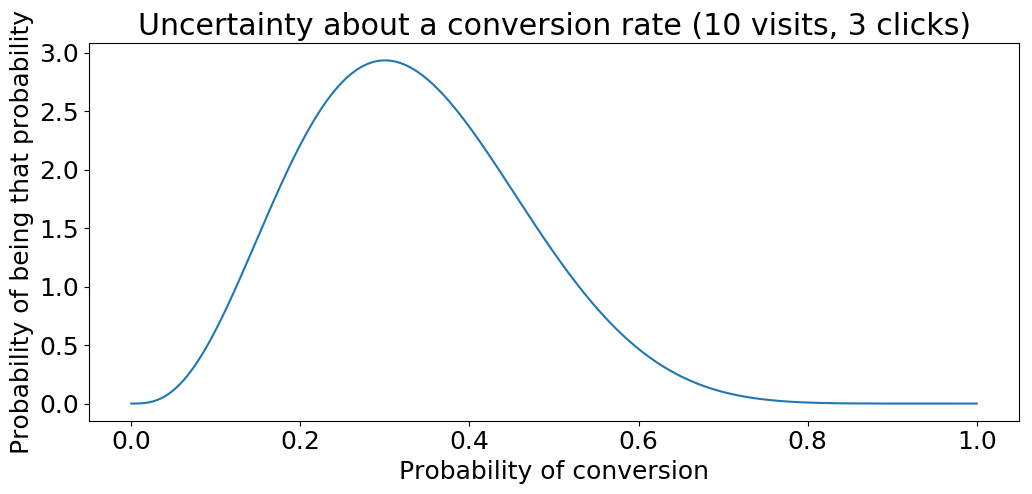

In [16]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt

x = numpy.linspace(0., 1., 1001)
y10 = scipy.stats.beta.pdf(x, 4, 8)
plt.title('Uncertainty about a conversion rate (10 visits, 3 clicks)')
plt.xlabel('Probability of conversion'); plt.ylabel('Probability of being that probability')
plt.plot(x, y10);

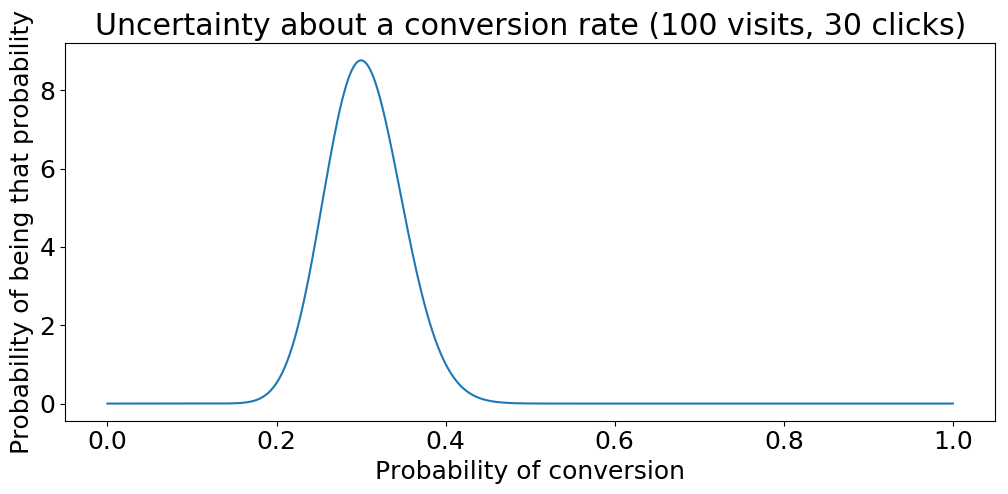

In [17]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt

x = numpy.linspace(0., 1., 1001)
y100 = scipy.stats.beta.pdf(x, 31, 71)
plt.title('Uncertainty about a conversion rate (100 visits, 30 clicks)')
plt.xlabel('Probability of conversion'); plt.ylabel('Probability of being that probability')
plt.plot(x, y100);

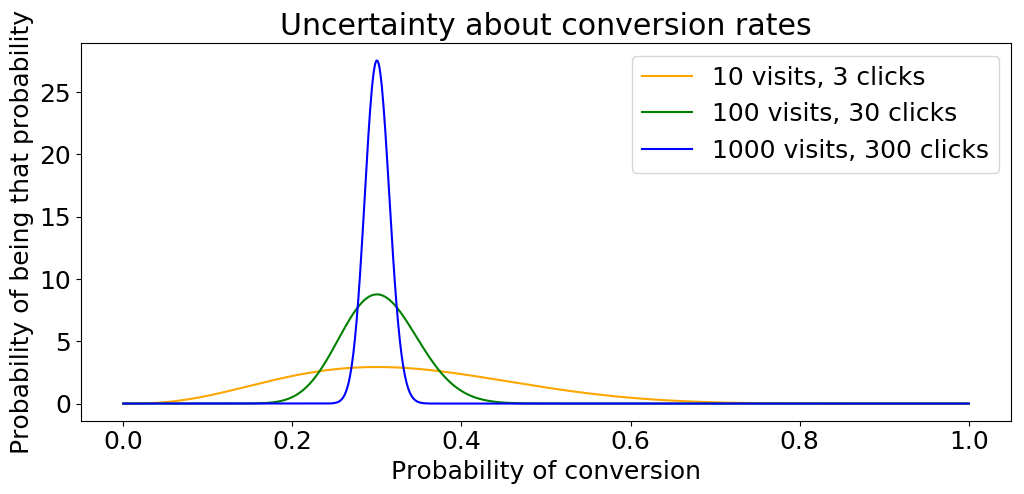

In [18]:
y1000 = scipy.stats.beta.pdf(x, 301, 701)
plt.title('Uncertainty about conversion rates')
plt.xlabel('Probability of conversion'); plt.ylabel('Probability of being that probability')
plt.plot(x, y10, color='orange', label='10 visits, 3 clicks')
plt.plot(x, y100, color='g', label='100 visits, 30 clicks')
plt.plot(x, y1000, color='b', label='1000 visits, 300 clicks')
plt.legend();

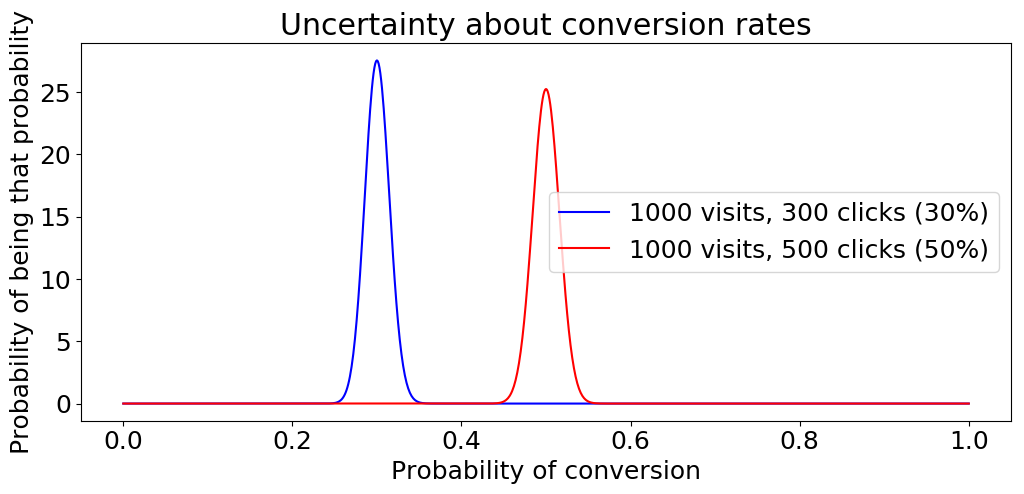

In [19]:
y1000_50 = scipy.stats.beta.pdf(x, 501, 501)
plt.title('Uncertainty about conversion rates')
plt.xlabel('Probability of conversion'); plt.ylabel('Probability of being that probability')
plt.plot(x, y1000, color='b', label='1000 visits, 300 clicks (30%)')
plt.plot(x, y1000_50, color='r', label='1000 visits, 500 clicks (50%)')
plt.legend();

## Sampling

If we can model a distribution, we can generate random samples from it

* This can be useful to get **insights** about the future
* This also assumes i.i.d.

## Comparing two distributions

We sample from both together

* We compare how each pair of samples compare

In [47]:
import scipy.stats

NUM_PAIR_SAMPLES = 100_000

A_CONVERSIONS = 23
A_NO_CONVERSIONS= 500 - A_CONVERSIONS

B_CONVERSIONS = 27
B_NO_CONVERSIONS = 500 - B_CONVERSIONS

a_samples = scipy.stats.beta.rvs(A_CONVERSIONS, A_NO_CONVERSIONS, size=NUM_PAIR_SAMPLES)
b_samples = scipy.stats.beta.rvs(B_CONVERSIONS, B_NO_CONVERSIONS, size=NUM_PAIR_SAMPLES)

wins = b_samples > a_samples

numpy.mean(wins)

0.72267000000000003

## Comparing two distributions

Is $\frac{27}{500}$ better than $\frac{23}{500}$?

* With what we know, it'll perform better 72.27% of the times

## Value at risk (VaR)

What is the probability that our conversion rate is lower than a threshold?

* The threshold can be our break-even point

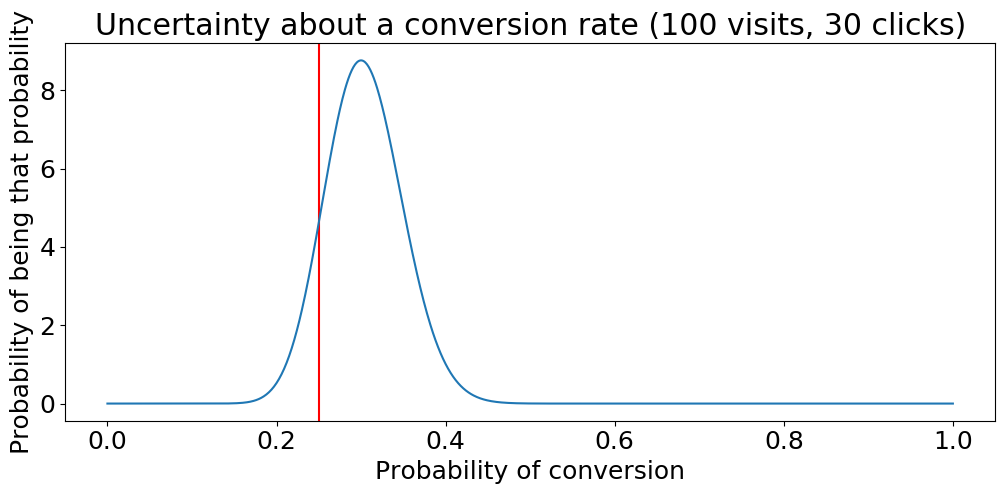

In [49]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt

x = numpy.linspace(0., 1., 1001)
y100 = scipy.stats.beta.pdf(x, 31, 71)
plt.title('Uncertainty about a conversion rate (100 visits, 30 clicks)')
plt.xlabel('Probability of conversion'); plt.ylabel('Probability of being that probability')
plt.axvline(.25, color='red')
plt.plot(x, y100);

In [50]:
import scipy.stats

NUM_SAMPLES = 100_000

THRESHOLD = .25

CONVERSIONS = 30
NO_CONVERSIONS= 100 - CONVERSIONS

samples = scipy.stats.beta.rvs(CONVERSIONS, NO_CONVERSIONS, size=NUM_SAMPLES)

looses = samples < THRESHOLD

numpy.mean(looses)

0.13635

## Value at risk (VaR)

What is the probability that our conversion rate is lower than a threshold?

* 100 visits, 30 clicks, threshold of 25%

    * 13.64% probability that or *real* conversion rate is lower than 25%

## Credible interval

Find a interval where the *real* conversion rate will be with 95% probability

In [55]:
import scipy.stats

NUM_SAMPLES = 100_000

CONVERSIONS = 30
NO_CONVERSIONS= 100 - CONVERSIONS

samples = scipy.stats.beta.rvs(CONVERSIONS, NO_CONVERSIONS, size=NUM_SAMPLES)

print(numpy.percentile(samples, 2.5))
print(numpy.percentile(samples, 97.5))

0.214205405085
0.392783490934


## Credible interval

Find a interval where the *real* conversion rate will be with 95% probability

* With 95% probability the *real* conversion rate will be between 21.42% and 39.28%

## Exploration and explotation dilemma

Two conflicting goals:

* **Explore:** We want to know all real conversion rates

* **Exploit:** We want to show users the best version

In [20]:
"""Implementation of a Thompson sampling strategy to optimize photos.

This is usually named the Multi-armed bandit problem.

For theory on how it works, I strongly recommend this book:
https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers
"""
import time
import itertools
import operator
import random
import copy
import numpy
import scipy.stats
import bokeh.plotting
import bokeh.io
import bokeh.models
import bokeh.palettes


bokeh.io.output_notebook()


DISTRIBUTION_POINTS = 1001

UNIFORM = 'uniform_sampler_strategy'
BEST = 'best_option_strategy'
WORSE = 'worse_option_strategy'
THOMPSON = 'thompson_sampler_strategy'


def does_user_like(photo_id, probabilities):
    """Simulating user behavior.
    
    Parameters
    ----------
    photo_id : int
        photo id that we want to know if is liked

    probabilities : list of float
        probability of each photo of being liked

    Returns
    -------
    bool
        whether the user liked the photo or not
    """
    return random.random() < probabilities[photo_id]


def uniform_sampler_strategy(beta_params, *args):
    """Return id of a random option based on uniform sampling.
    
    Parameters
    ----------
    beta_params : list of tuple
        each item in the list is a tuple of (alpha, beta) parameters
        of the beta distribution of each option

    Returns
    -------
    int
        index of the option selected as the best

    Examples
    --------
    >>> random.seed(12345)
    >>> beta_params = [[30, 70], [50, 50]]  # both options are equally likely
    >>> uniform_sampler_strategy(beta_params)
    1
    """
    return random.choice(range(len(beta_params)))


def best_option_strategy(beta_params, probabilities):
    """Return id of the best option, checking it from the real probabilities.
    
    Parameters
    ----------
    beta_params : list of tuple
        each item in the list is a tuple of (alpha, beta) parameters
        of the beta distribution of each option

    Returns
    -------
    int
        index of the option selected as the best

    probabilities : list of float
        probability of each photo of being liked

    Examples
    --------
    >>> # best (greater) option is the third (index 2), 0.5
    >>> best_option_strategy([], (.1, .3, .5, .2))
    2
    """
    return numpy.argmax(probabilities)


def worse_option_strategy(beta_params, probabilities):
    """Return id of the worse option, checking it from the real probabilities.
    
    Parameters
    ----------
    beta_params : list of tuple
        each item in the list is a tuple of (alpha, beta) parameters
        of the beta distribution of each option

    Returns
    -------
    int
        index of the option selected as the best

    Examples
    --------
    >>> # worst (lower) option is the first (index 0), 0.1
    >>> best_option_strategy([], (.1, .3, .5, .2))
    0
    """
    return numpy.argmin(probabilities)


def thompson_sampler_strategy(beta_params, *args):
    """Return id of the expected best option to show based on Thompson sampling.
    
    Parameters
    ----------
    beta_params : list of tuple
        each item in the list is a tuple of (alpha, beta) parameters
        of the beta distribution of each option

    Returns
    -------
    int
        index of the option selected as the best

    Examples
    --------
    >>> numpy.random.seed(12345)
    >>> beta_params = [[30, 70], [50, 50]]  # second option is better, 0.5 to 0.3
    >>> thompson_sampler_select_best_option(beta_params)
    1
    """
    return numpy.argmax([scipy.stats.beta.rvs(*p) for p in beta_params])


def play_encounters(strategies, probabilities):
    """Show photos to users, and keep track on the ones liked.
    
    Parameters
    ----------
    num_votes : int
        number of times that (virtual) users will vote a photo

    strategies: list of function
        functions that implement the strategies we want to evaluate
    """

    # we initialize 4 photos, and all them with one like and one dislike
    # these are the Bayesian priors, and mean that a priori all probabilities
    # are equally likely
    status = {s.__name__: [[1, 1] for p in probabilities] for s in strategies}
    yield status

    while True:
        status = copy.deepcopy(status)
        for strategy in strategies:
            photo_to_show = strategy(status[strategy.__name__], probabilities)
            did_user_like = does_user_like(photo_to_show, probabilities)
            # updating the history with the result
            status[strategy.__name__][photo_to_show][not did_user_like] +=1

        yield status


def distributions_data(beta_params):
    data = {'x': numpy.linspace(0., 1., DISTRIBUTION_POINTS)}
    for i, params in enumerate(beta_params):
        data['y%d' % i] = scipy.stats.beta.pdf(data['x'], *params)
    return data


def distributions_plot(source, names, num_options):
    """Plot showing the beta distributions shape."""
    p = bokeh.plotting.figure(title='Probability distributions', plot_width=960, plot_height=320)

    colors = itertools.cycle(bokeh.palettes.Set1[min(max(3, num_options), 10)])

    for i, color in zip(range(num_options), colors):
        p.line('x', 'y%d' % i, color=color, legend=names[i], source=source)

    p.legend.click_policy = 'hide'

    return p


def options_data(beta_params):
    likes, dislikes = zip(*beta_params)
    num_options = len(likes)
    top = list(range(0, -num_options, -1))
    total = [l + d for l, d in beta_params]
    colors = itertools.cycle(bokeh.palettes.Set1[min(max(3, len(beta_params)), 10)])

    return {'likes': list(likes),
            'dislikes': list(dislikes),
            'total': total,
            'prob': ['%.2f' % (l / (l + d)) for l, d in beta_params],
            'color': list(itertools.islice(colors, num_options)),
            'top': top,
            'bottom': [t - .7 for t in top],
            'text_left': [t + 5 for t in total],
            'text_bottom': [t - .5 for t in top]}


def options_plot(source):
    """Plot showing the number of times each option has been samples,
    and their empiric probabilities."""
    num_options = len(source.data['likes'])
    p = bokeh.plotting.figure(title='Options', plot_width=480, plot_height=320)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.yaxis.major_tick_line_color = None
    p.yaxis.minor_tick_line_color = None
    p.yaxis.major_label_text_font_size = '0pt'

    p.quad(left=0.1, right='dislikes', top='top', bottom='bottom', color='color', source=source, fill_alpha=.5, line_color=None)
    p.quad(left='dislikes', right='total', top='top', bottom='bottom', color='color', source=source, line_color=None)
    p.add_glyph(source, bokeh.models.glyphs.Text(x=-5, y='text_bottom', text='prob'))

    return p


def history_plot(source):
    """Plot showing the cumulative wins history of each strategy."""
    p = bokeh.plotting.figure(title='Likes history', plot_width=480, plot_height=320)
    strategies = [s for s in source.data if s != 'x']
    colors = itertools.cycle(bokeh.palettes.Plasma[min(max(3, len(strategies)), 10)])
    for strategy in strategies:
        p.line('x', strategy, legend=strategy.split('_')[0], color=next(colors), source=source)

    p.legend.location = 'top_left'
    p.legend.click_policy = 'hide'
    
    return p


def run_simulation(strategy, names, probabilities, step=1, sleep=.1):
    assert len(names) == len(probabilities)
    num_options = len(names)

    strategies = [best_option_strategy,
                  thompson_sampler_strategy,
                  uniform_sampler_strategy,
                  worse_option_strategy]

    encounters_generator = play_encounters(strategies, probabilities)
    result = next(encounters_generator)

    source_distributions = bokeh.models.sources.ColumnDataSource(data=distributions_data(result[strategy]))
    source_options = bokeh.models.sources.ColumnDataSource(options_data(result[strategy]))
    history = {s: [0] for s in result}
    history['x'] = [0]
    source_history = bokeh.models.sources.ColumnDataSource(history)

    joint_plot = bokeh.io.gridplot([[distributions_plot(source_distributions, names, num_options)],
                                    [options_plot(source_options),
                                     history_plot(source_history)]])

    handle = bokeh.io.show(joint_plot, notebook_handle=True)

    try:
        for i, result in enumerate(encounters_generator):
            source_distributions.stream(distributions_data(result[strategy]), DISTRIBUTION_POINTS)
            history = {s: [sum(map(operator.itemgetter(0), v))] for s, v in result.items()}
            history['x'] = [i + 1]
            source_history.stream(history)
            source_options.stream(options_data(result[strategy]), num_options)

            if not i % step:
                if sleep:
                    time.sleep(sleep)
                bokeh.io.push_notebook(handle=handle)
    except KeyboardInterrupt:
        pass

Loading BokehJS ...

In [56]:
run_simulation(strategy=THOMPSON,
               names=('Red button: 23%', 'Blue button: 57%'),
               probabilities=(.23, .57))

## Bayes formula

$$P(\theta|X) = \frac{P(X|\theta) \cdot P(\theta)}{P(X)}$$

## Bayes formula

$$Posterior \propto Prior \cdot New\ evidence$$

## Getting started on Bayesian methods

<img alt="" src="img/bayesian_methods_for_hackers.jpeg" style="width: 60%;"/>

https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

![](img/pymc3.svg)

https://github.com/pymc-devs/pymc3

https://www.meetup.com/Python-Sprints/

# Thank you!

@datapythonista